In [3]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
############## Load expression data (single-cell)

In [5]:
# Seurat object
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
sce_filename = paste0(mydir,"cell_type.RDS")

In [5]:
sce = readRDS(sce_filename)
sce

Loading required package: Seurat

Attaching SeuratObject



An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [17]:
######## make input files
input_files_dir = paste0(mydir,"input_files_CellRegMap/")

In [7]:
####### make sample mapping file (smf)

In [10]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [27]:
unique(as.character(df$cell_type))

[1] "CD4+ KLRB1+ T cell"      "XCL1- NK"               
 [3] "CD4+ KLRB1- T cell"      "CD8+ S100B+ T cell"     
 [5] "CD8+ GNLY+ NKG7+ T cell" "TCL1A+ FCER2+ B cell"   
 [7] "CD8+ LTB+ T cell"        "TCL1A- FCER2- B cell"   
 [9] "XCL1+ NK"                "Monocyte FCGR3A+"       
[11] "Monocyte CD14+"          "Dendritic cell"         
[13] "IgJ+ B cell"             "CD4+ SOX4+ T cell"

In [23]:
### Monocyte only SMF
monos = unique(as.character(df$cell_type))[grep("Mono", unique(as.character(df$cell_type)))]
monos

[1] "Monocyte FCGR3A+" "Monocyte CD14+"

In [24]:
df_mono = df[df$cell_type %in% monos,]
nrow(df_mono)
head(df_mono,2)

[1] 53399

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2,cell
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>,<chr>
AAACGGGCACTTAAGC-1,onek1k,7546,1849,pool_1,683_684,4.624967,b1,4405,1798,Monocyte FCGR3A+,0.9836972,Mono,0.9836972,CD16 Mono,AAACGGGCACTTAAGC-1
AAACGGGTCTTGTTTG-1,onek1k,7910,2008,pool_1,693_694,3.388116,b1,4430,1936,Monocyte CD14+,1.0000000,Mono,1.0000000,CD14 Mono,AAACGGGTCTTGTTTG-1


In [25]:
# retain only second part of individual ID (samples sequenced twice)
smf_df = data.frame(phenotype_sample_id = rownames(df_mono), 
                    genotype_individual_id = gsub(".*_","",df_mono$individual),
                   individual_long = df_mono$individual)
head(smf_df)

,phenotype_sample_id,genotype_individual_id,individual_long
,<chr>,<chr>,<chr>
1,AAACGGGCACTTAAGC-1,684,683_684
2,AAACGGGTCTTGTTTG-1,694,693_694
3,AAAGATGAGTACGACG-1,690,689_690
4,AAAGATGGTGTGAATA-1,693,692_693
5,AAAGATGTCAAACAAG-1,683,682_683
6,AAAGCAACACCGCTAG-1,685,684_685


In [31]:
smf_filename = paste0(input_files_dir,"smf_monocytes.csv")
smf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/smf_monocytes.csv"

In [15]:
write.csv(smf_df, smf_filename)

In [16]:
##################################################
##### cell contexts (Monocytes only)

In [17]:
Monos = colnames(sce)[colnames(sce) %in% rownames(df_mono)]
length(Monos)
head(Monos)

[1] 53399

[1] "AAACGGGCACTTAAGC-1" "AAACGGGTCTTGTTTG-1" "AAAGATGAGTACGACG-1"
[4] "AAAGATGGTGTGAATA-1" "AAAGATGTCAAACAAG-1" "AAAGCAACACCGCTAG-1"

In [6]:
sce_mono = sce[,colnames(sce) %in% Monos]
sce_mono

ERROR: Error in eval(expr, envir, enclos): object 'sce' not found


In [20]:
saveRDS(sce_mono, paste0(mydir,"Monocytes_sce.rds"))

In [7]:
sce_mono = readRDS(paste0(mydir,"Monocytes_sce.rds"))
sce_mono

Loading required package: SeuratObject

Loading required package: Seurat



An object of class Seurat 
57641 features across 53399 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [8]:
# this would probably be faster in python / hail
sce_mono = RunPCA(sce_mono)

PC_ 1 
Positive:  S100A9, S100A8, LYZ, S100A12, RP11-1143G9.4, CST3, FCN1, TYROBP, FTL, IL8 
	   CSTA, VCAN, LST1, CD14, AIF1, MNDA, S100A6, CTSS, FTH1, GPX1 
	   FCER1G, LGALS1, MS4A6A, S100A11, CFD, G0S2, FOS, RBP7, TYMP, SERPINA1 
Negative:  GNLY, NKG7, CCL5, RPS27, RPS29, KLRB1, IL32, MALAT1, GZMB, CST7 
	   RPS18, GZMA, RPS19, RPL13A, LTB, FGFBP2, GZMH, RPS6, RPS27A, RPS12 
	   RPLP2, EEF1A1, CTSW, RPL21, CMC1, RPL13, RPL41, PTPRCAP, RPS25, RPS4X 
PC_ 2 
Positive:  S100A8, S100A9, S100A12, GNLY, NKG7, CCL5, RPS27, KLRB1, RPS29, RPL13 
	   RPLP2, IL32, RPS18, RPS12, RPL13A, RPS27A, GZMB, CST7, GZMA, RPS6 
	   FGFBP2, RPS15A, LTB, GZMH, RPL32, CTSW, PTPRCAP, RPL34, RPLP1, RPS28 
Negative:  LST1, CST3, LYZ, AIF1, LYPD2, FTH1, FTL, FCER1G, TYROBP, SAT1 
	   SERPINA1, MS4A7, CFD, IFITM3, CTSS, COTL1, FCN1, RP11-290F20.3, PSAP, CD68 
	   FCGR3A, S100A11, SPI1, HLA-DRA, VMO1, C1QA, HLA-DPA1, TYMP, S100A4, PILRA 
PC_ 3 
Positive:  S100A8, S100A9, LYPD2, LST1, AIF1, MS4A7, FCER1G, FCGR3A, 

In [9]:
pca_df = as.data.frame(Embeddings(sce_mono, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 53399    50

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGGGCACTTAAGC-1,12.587889,-98.91617782,58.4239076,56.1671055,-75.0999752,-30.9405266,-17.908536,-8.6468133,-18.8143336,-0.1347962,⋯,0.7398204,2.572673,1.626228,4.730643,-6.534745,2.8043219,1.8675014,-1.5390686,2.747941,-4.4871811
AAACGGGTCTTGTTTG-1,71.726976,-40.43483841,-26.5660683,-8.2085904,3.0373513,-6.6830850,3.140615,0.2622130,-2.9817984,-13.0061208,⋯,-5.2165253,-2.827687,-6.288438,4.462295,-1.318414,2.7736648,1.4923112,3.2304557,-3.093596,3.6374036
AAAGATGAGTACGACG-1,114.227714,-18.37090524,-5.8610621,-2.7658289,8.1539573,-0.2314968,-2.310401,17.8736656,-16.5043198,0.6937847,⋯,1.3929371,-10.154055,-5.356420,5.337847,2.728363,-3.2723993,6.5395276,2.8360781,7.601294,-2.9030833
AAAGATGGTGTGAATA-1,4.638304,-0.01520754,-0.8049306,-0.1219464,-0.1026753,-0.7130981,-1.239762,0.1920019,-0.7853569,0.5338786,⋯,-33.9339058,3.685187,-23.936067,-4.637643,16.280755,-0.4405251,0.2744323,1.3212978,-5.570765,6.0577013
AAAGATGTCAAACAAG-1,101.992474,-19.96421766,-4.6261625,-14.1385655,-4.3466661,-3.0140406,3.563465,3.2068705,2.0104378,-8.5142853,⋯,0.8585795,-3.115371,-5.211083,-4.127748,-2.828146,3.8525361,8.5323927,6.6730024,-6.935018,-1.7055142
AAAGCAACACCGCTAG-1,109.077699,-34.34089077,-2.8050476,-20.5820662,-2.2429447,4.2788333,4.648691,0.6254874,-7.9713660,-4.2661325,⋯,7.9078065,-1.086741,-3.263176,7.274395,5.115474,0.3143351,-3.1797835,0.2656692,4.852209,-0.8092426


In [11]:
pca_df$cell = rownames(pca_df)
df$cell = rownames(df)
df_to_plot = inner_join(pca_df, df, by = "cell")

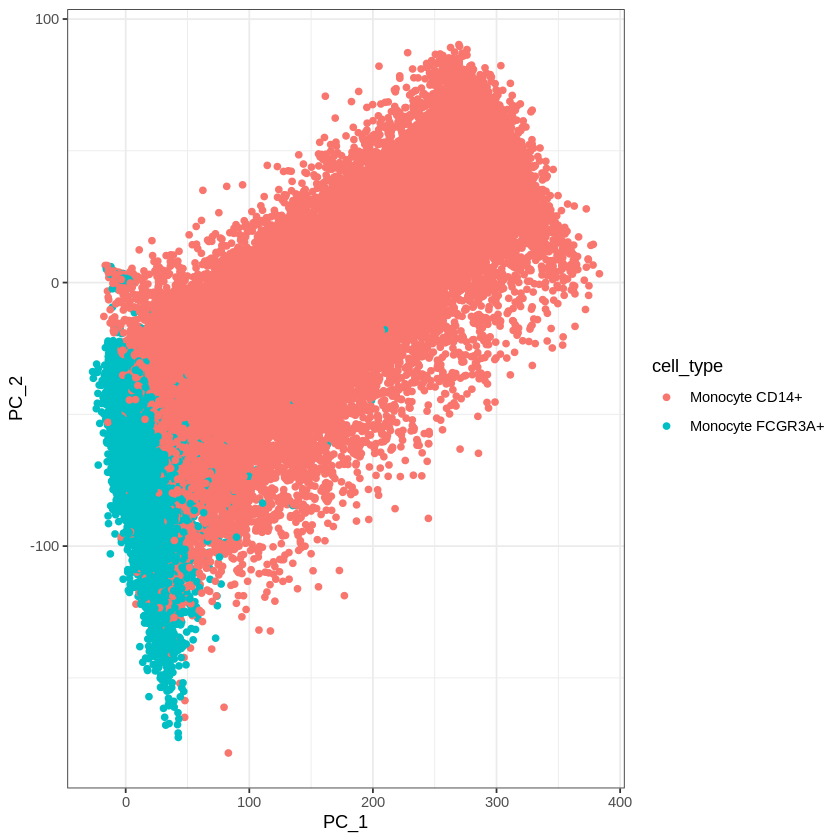

In [12]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw()

In [13]:
df_colours = read.csv(paste0(mydir,"celltype_colours.csv"), row.names=1)
head(df_colours)

,cell_type,colours
,<chr>,<chr>
1,CD4+ KLRB1- T cell,#882E72
2,CD4+ KLRB1+ T cell,#B178A6
3,CD4+ SOX4+ T cell,#D6C1DE
4,CD8+ GNLY+ NKG7+ T cell,#1965B0
5,CD8+ LTB+ T cell,#5289C7
6,CD8+ S100B+ T cell,#7BAFDE


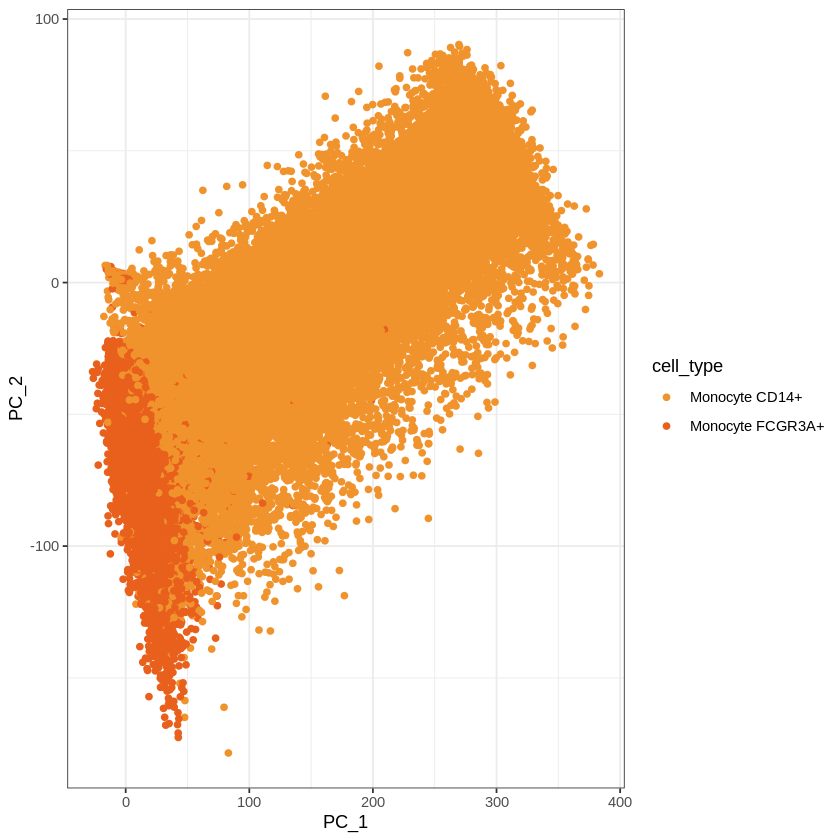

In [14]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw() +
    scale_colour_manual(values = df_colours[grep("Mono",df_colours$cell_type),]$colours) 

In [18]:
C_filename = paste0(input_files_dir,"PCs_monocytes.csv")
C_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/PCs_monocytes.csv"

In [19]:
write.csv(pca_df, C_filename)

In [43]:
## SEX Covariates
covs_filename =  paste0(mydir,"/covariates.tsv")
df_covs = read.csv(covs_filename, sep="\t")
head(df_covs)

,sampleid,SEX,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1_1,2,0.02775250,-0.000592955,0.00757785,-0.01409290,0.009323330,0.031375400
2,10_10,2,0.02052560,0.040040200,-0.01847820,0.03658380,-0.014617600,0.013474100
3,1000_1001,2,0.01081720,-0.004233600,0.00537891,-0.02058190,-0.027539500,-0.039861100
4,1001_1002,2,0.01211940,0.000788658,-0.00671328,-0.01969960,-0.000180694,0.037322600
5,1002_1003,1,-0.05739470,-0.019243700,0.00442424,0.00619121,-0.010877400,-0.013743000
6,1003_1004,2,0.00532722,0.008837440,-0.01299120,0.00997544,-0.024854800,0.000188687


In [44]:
## Age covariates
age_filename =  paste0(mydir,"/age_covariate.tsv")
df_age = read.csv(age_filename, sep="\t")
colnames(df_age)[1] = "sampleid"
head(df_age)

,sampleid,age
,<chr>,<int>
1,1_1,65
2,2_2,48
3,3_3,53
4,4_4,48
5,5_5,41
6,6_6,79


In [45]:
meta_w_sex_age = inner_join(df_covs, df_age)
head(meta_w_sex_age,2)
colnames(meta_w_sex_age)

Joining, by = "sampleid"


,sampleid,SEX,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,age
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1_1,2,0.0277525,-0.000592955,0.00757785,-0.0140929,0.00932333,0.0313754,65
2,10_10,2,0.0205256,0.040040200,-0.01847820,0.0365838,-0.01461760,0.0134741,78


[1] "sampleid" "SEX"      "PCA1"     "PCA2"     "PCA3"     "PCA4"     "PCA5"    
[8] "PCA6"     "age"

In [46]:
nrow(pca_df)
nrow(meta_w_sex_age)

[1] 53399

[1] 982

In [47]:
smf_df$cell = smf_df$phenotype_sample_id
pca_df$cell = rownames(pca_df)

In [48]:
pca_donor = inner_join(pca_df, smf_df, by="cell")
head(pca_donor,2)
nrow(pca_donor)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,cell,phenotype_sample_id,genotype_individual_id,individual_long
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,12.58789,-98.91618,58.42391,56.16711,-75.099975,-30.940527,-17.908536,-8.646813,-18.814334,-0.1347962,⋯,-6.534745,2.804322,1.867501,-1.539069,2.747941,-4.487181,AAACGGGCACTTAAGC-1,AAACGGGCACTTAAGC-1,684,683_684
2,71.72698,-40.43484,-26.56607,-8.20859,3.037351,-6.683085,3.140615,0.262213,-2.981798,-13.0061208,⋯,-1.318414,2.773665,1.492311,3.230456,-3.093596,3.637404,AAACGGGTCTTGTTTG-1,AAACGGGTCTTGTTTG-1,694,693_694


[1] 53399

In [49]:
length(unique(pca_donor$cell))

[1] 53399

In [51]:
meta_w_sex_age$individual = meta_w_sex_age$sampleid
head(meta_w_sex_age,2)
nrow(meta_w_sex_age)
length(unique(meta_w_sex_age$individual))

,sampleid,SEX,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,age,individual
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1_1,2,0.0277525,-0.000592955,0.00757785,-0.0140929,0.00932333,0.0313754,65,1_1
2,10_10,2,0.0205256,0.040040200,-0.01847820,0.0365838,-0.01461760,0.0134741,78,10_10


[1] 982

[1] 982

In [52]:
pca_donor$individual = pca_donor$individual_long
contexts_df = inner_join(pca_donor, meta_w_sex_age, by="individual")

In [53]:
length(unique(contexts_df$cell))

[1] 53399

In [54]:
head(contexts_df,2)
nrow(contexts_df)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,individual,sampleid,SEX,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,12.58789,-98.91618,58.42391,56.16711,-75.099975,-30.940527,-17.908536,-8.646813,-18.814334,-0.1347962,⋯,683_684,683_684,1,0.0279223,0.0562922,-0.03088590,0.0178595,0.000407331,-0.00736431,78
2,71.72698,-40.43484,-26.56607,-8.20859,3.037351,-6.683085,3.140615,0.262213,-2.981798,-13.0061208,⋯,693_694,693_694,2,0.0325190,-0.1007030,-0.00874335,0.0346661,-0.021470900,0.01984950,88


[1] 53399

In [68]:
rownames(contexts_df) = contexts_df$cell
cols = c("SEX","age",paste0("PC_",1:20))
pcs_age_sex = contexts_df[,cols]
head(pcs_age_sex,2)
nrow(pcs_age_sex)

,SEX,age,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,⋯,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGGGCACTTAAGC-1,1,78,12.58789,-98.91618,58.42391,56.16711,-75.099975,-30.940527,-17.908536,-8.646813,⋯,-3.397215,13.4413218,1.779408,-2.430423,2.872384,-2.109803,2.675679,-0.8878944,0.7524842,6.337516
AAACGGGTCTTGTTTG-1,2,88,71.72698,-40.43484,-26.56607,-8.20859,3.037351,-6.683085,3.140615,0.262213,⋯,2.341336,0.6716006,-2.382973,-4.243087,-4.503169,-7.362024,13.097628,-3.5250838,-0.9140721,-10.979878


[1] 53399

In [69]:
C_filename1 = paste0(input_files_dir,"PCs_sex_age_monocytes.csv")
C_filename1

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/PCs_sex_age_monocytes.csv"

In [70]:
write.csv(pcs_age_sex, C_filename1)

In [61]:
cols = c("SEX",paste0("PC_",1:20))
pcs_sex = contexts_df[,cols]
head(pcs_sex,2)
nrow(pcs_sex)

,SEX,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,⋯,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGGGCACTTAAGC-1,1,12.58789,-98.91618,58.42391,56.16711,-75.099975,-30.940527,-17.908536,-8.646813,-18.814334,⋯,-3.397215,13.4413218,1.779408,-2.430423,2.872384,-2.109803,2.675679,-0.8878944,0.7524842,6.337516
AAACGGGTCTTGTTTG-1,2,71.72698,-40.43484,-26.56607,-8.20859,3.037351,-6.683085,3.140615,0.262213,-2.981798,⋯,2.341336,0.6716006,-2.382973,-4.243087,-4.503169,-7.362024,13.097628,-3.5250838,-0.9140721,-10.979878


[1] 53399

In [62]:
C_filename2 = paste0(input_files_dir,"PCs_sex_monocytes.csv")
C_filename2

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/PCs_sex_monocytes.csv"

In [64]:
write.csv(pcs_sex, C_filename2)

In [36]:
table(contexts_df$SEX)


       1        2 
32721511 37638970 

In [37]:
table(contexts_df$age)


     19      20      21      22      23      24      25      26      27      28 
 594726  323008   32562  355591  485820  322504  174906   72524  143085  177520 
     29      30      31      32      33      34      35      36      37      38 
 211302  191607  385708  922688  246303  226844  381140  503671   97160  299628 
     39      40      41      42      43      44      45      46      47      48 
 225650  436436  393104  694422  484416  744924  408508  921704  132063  918083 
     49      50      51      52      53      54      55      56      57      58 
 482323  439207  597938  788220  728647  797958  233841  573133 1753395  709249 
     59      60      61      62      63      64      65      66      67      68 
2341485 1861608 1305303 1034264 1176676 1517928 1482014 2657367 1544671 2028162 
     69      70      71      72      73      74      75      76      77      78 
1741616 2327591 3869527 2066317 2354960 1458337 1854681 2537730 1673571 1484996 
     79      80      81    

In [ ]:
ggplot(contexts_df, aes(x=PC_1, y = PC_2, colour = age)) + geom_point() + theme_bw() 

In [ ]:
ggplot(contexts_df, aes(x=PC_1, y = PC_2, colour = SEX)) + geom_point() + theme_bw() 

In [ ]:
##################################################
##### feature-variant filter file (B-cells only)

In [1]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"

In [2]:
## eQTL results
results_filename =  paste0(mydir,"OneK1K_eQTLs_Results_03022021.tsv")
eqtl_df = read.csv(results_filename, sep="\t")
head(eqtl_df)

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05
3,B IN,GDI2,ENSG00000057608,rs3736461,10,5855403,C,eSNP1,-0.278,201715943,6.764e-19,6.078e-15,2.164e-05
4,B IN,OPTN,ENSG00000123240,rs57057378,10,13160035,A,eSNP1,-0.258,198494721,2.342e-16,2.032e-12,2.164e-05
5,B IN,MGMT,ENSG00000170430,rs12254582,10,131279791,G,eSNP1,-0.220,192526141,3.259e-12,2.150e-08,2.164e-05
6,B IN,VDAC2,ENSG00000165637,rs11543,10,76970613,C,eSNP1,-0.219,192405014,3.889e-12,2.546e-08,2.164e-05


In [3]:
Monocyte_eqtls = eqtl_df[grep("Mono ",eqtl_df$cell_type),]
nrow(Monocyte_eqtls)
head(Monocyte_eqtls,2)

[1] 2183

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19796,Mono C,LIPA,ENSG00000107798,rs1412445,10,91002804,T,eSNP1,0.352,98291971,1.302e-29,1.577e-23,4.238e-05
19797,Mono C,KIAA1598,ENSG00000187164,rs72833408,10,118723484,T,eSNP1,0.324,102469879,3.684e-25,4.440e-20,4.238e-05


In [4]:
unique(Monocyte_eqtls$cell_type)

[1] "Mono C"  "Mono NC"

In [5]:
Monocyte_eqtls$chrom = Monocyte_eqtls$Chromosome
Monocyte_eqtls$feature = Monocyte_eqtls$GeneID
Monocyte_eqtls$snp_id = paste0(Monocyte_eqtls$chrom,":",Monocyte_eqtls$Position)

In [6]:
fvf_df = Monocyte_eqtls[,c("feature","snp_id","chrom")]
head(fvf_df,100)

,feature,snp_id,chrom
,<chr>,<chr>,<int>
19796,LIPA,10:91002804,10
19797,KIAA1598,10:118723484,10
19798,ADK,10:75928933,10
19799,PSAP,10:73569318,10
19800,C10orf32,10:104611764,10
19801,MGMT,10:131364237,10
19802,WAC-AS1,10:28800170,10
19803,UBE2D1,10:60144207,10
19804,KCNMA1,10:79357311,10


In [7]:
fvf_df[fvf_df$chrom==2,] 

,feature,snp_id,chrom
,<chr>,<chr>,<int>
20149,RP11-347P5.1,2:196985112,2
20150,MARCO,2:119707051,2
20151,PPIL3,2:201742345,2
20152,DBI,2:120120065,2
20153,CAPG,2:85626524,2
20154,CYP27A1,2:219665715,2
20155,NAGK,2:71297982,2
20156,NEU4,2:242758179,2
20157,RP11-245G13.2,2:11017287,2


In [8]:
######## input files folder
input_files_dir = paste0(mydir,"input_files_CellRegMap/")

In [9]:
fvf_filename = paste0(input_files_dir,"fvf_Monocyte_eqtls.csv")
fvf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/fvf_Monocyte_eqtls.csv"

In [10]:
write.csv(fvf_df, fvf_filename)